In [74]:
# @title Install required libraries

%pip install google-ml-edu keras matplotlib numpy pandas tensorflow plotly

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# @title Load the imports

import io
import keras
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import ml_edu.experiment
import ml_edu.results
import numpy as np
import pandas as pd
import plotly.express as px

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.5f}".format

print("Ran the import statements.")

Ran the import statements.


In [76]:
# @title Load the dataset
dataset_raw = pd.read_csv("out2/all.csv", delimiter=';', )
print("Data load.")
# dataset_raw = dataset_raw.loc[
#     lambda x: (101324.0 < x["pressure"]) & (x["pressure"] < 101326.0)
# ]

#dataset_raw.dropl(axis="columns")
dataset_raw.describe()

Data load.


,T,pressure,atom_n,n0,n1,n2,n3,n4,n5,n6,...,n41,n42,n43,n44,n45,n46,n47,thermal_conductivity,shear_viscosity,bulk_viscosity
count,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,...,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000
mean,5002.50000,25331.23458,0.50000,673920608996666598490112.00000,39044723360132577099776.00000,16303368777048570986496.00000,8343584106832391569408.00000,4698284667971155001344.00000,2801663205071408070656.00000,1737214344938714300416.00000,...,87813131890472784.00000,74158216330748368.00000,62980281774831920.00000,53790102086334800.00000,46201970202657424.00000,39910579619644368.00000,34673287399605736.00000,0.12432,0.00007,0.00008
std,2886.99158,0.04757,0.32663,6244766953489709039353856.00000,34754912518594795405312.00000,13885123773876947386368.00000,7617846597560489213952.00000,4685946602394406092800.00000,3040741324591793700864.00000,2034544746976774455296.00000,...,234598193394208800.00000,199631289507798400.00000,170775365473087680.00000,146867795889582432.00000,126982847701784752.00000,110380918585961792.00000,96468895048979968.00000,0.04453,0.00003,0.00006
min,5.00000,25331.20000,0.10000,5074469999999999541248.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00179,0.00000,0.00000
25%,2503.75000,25331.20000,0.10000,31279424999999997476864.00000,9130949999999999541248.00000,3638587499999999819776.00000,1951175000000000163840.00000,727310249999999959040.00000,223873500000000016384.00000,67341975000000004096.00000,...,323071.75000,173821.00000,94580.85000,52922.45000,30676.95000,18140.00000,10888.05000,0.09286,0.00005,0.00002
50%,5002.50000,25331.20000,0.50000,76309150000000008192000.00000,31480100000000001441792.00000,15140350000000000851968.00000,6530994999999999246336.00000,1831049999999999934464.00000,1003720000000000000000.00000,684937999999999934464.00000,...,77469150000000.00000,57055300000000.00000,42388800000000.00000,31691550000000.00000,24052100000000.00000,18425200000000.00000,14212100000000.00000,0.13143,0.00008,0.00006
75%,7501.25000,25331.30000,0.90000,234265249999999989710848.00000,60393575000000002260992.00000,24821650000000000720896.00000,12364824999999999836160.00000,7440277500000000278528.00000,4965612499999999918080.00000,3221242499999999721472.00000,...,33514950000000000.00000,27328025000000000.00000,22451575000000000.00000,18533025000000000.00000,15384025000000000.00000,12884150000000000.00000,10863000000000000.00000,0.16102,0.00009,0.00012
max,10000.00000,25331.30000,0.90000,330252000000000031415336960.00000,128020000000000003145728.00000,44007899999999998558208.00000,22279600000000000524288.00000,13482100000000000917504.00000,9052359999999999737856.00000,6501829999999999541248.00000,...,1633270000000000000.00000,1399770000000000000.00000,1205610000000000000.00000,1043580000000000000.00000,907881000000000000.00000,793839000000000000.00000,697678000000000000.00000,0.19890,0.00012,0.00022


In [77]:
dataset_raw.head(20)
#dataset_raw.duplicated

,T,pressure,atom_n,n0,n1,n2,n3,n4,n5,n6,...,n41,n42,n43,n44,n45,n46,n47,thermal_conductivity,shear_viscosity,bulk_viscosity
0,5,25331.20000,0.90000,36694700000000000550502400.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00316,0.00000,0.00000
1,10,25331.20000,0.90000,18347299999999998958764032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00539,0.00000,0.00000
2,15,25331.20000,0.90000,12231600000000001061158912.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00701,0.00000,0.00000
3,20,25331.20000,0.90000,9173670000000000220725248.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00832,0.00000,0.00000
4,25,25331.30000,0.90000,7338930000000000276299776.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00945,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,25331.20000,0.90000,2293420000000000013631488.00000,1453250.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01756,0.00001,0.00000
16,85,25331.20000,0.90000,2158509999999999966969856.00000,16087500.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01811,0.00001,0.00000
17,90,25331.30000,0.90000,2038589999999999895666688.00000,135895000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01865,0.00001,0.00000
18,95,25331.20000,0.90000,1931300000000000099614720.00000,914317000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01917,0.00001,0.00000


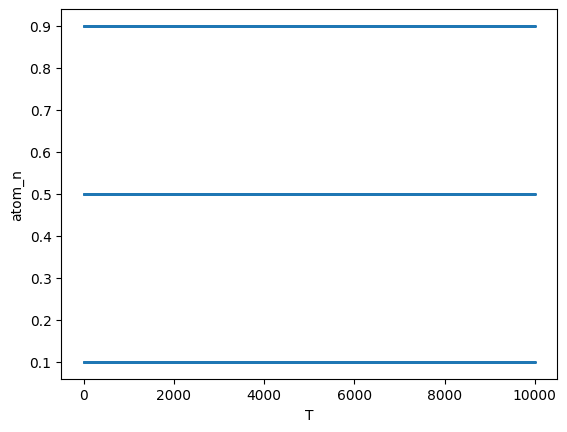

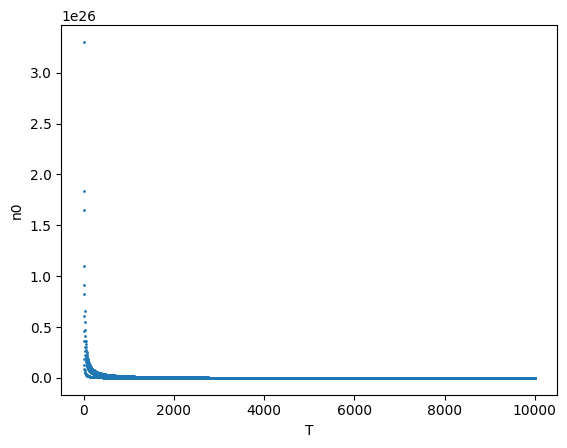

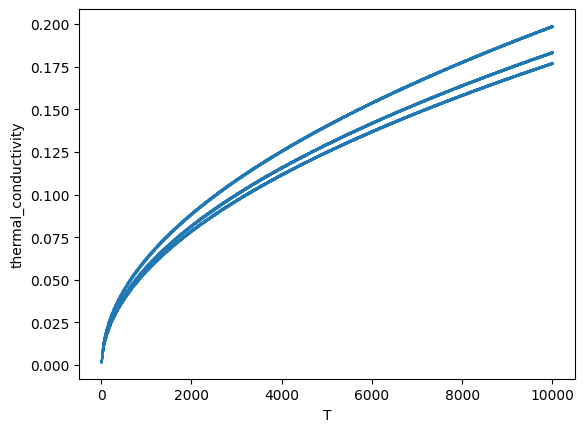

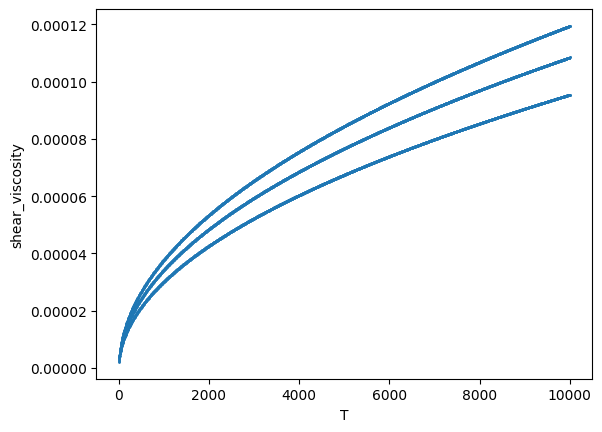

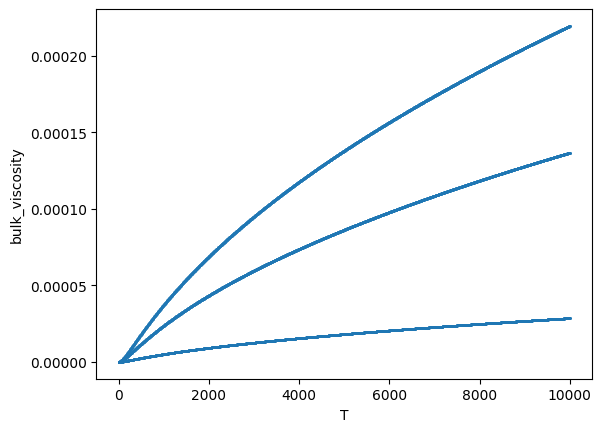

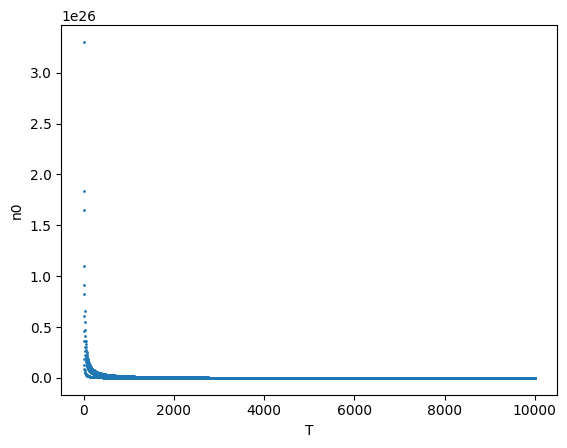

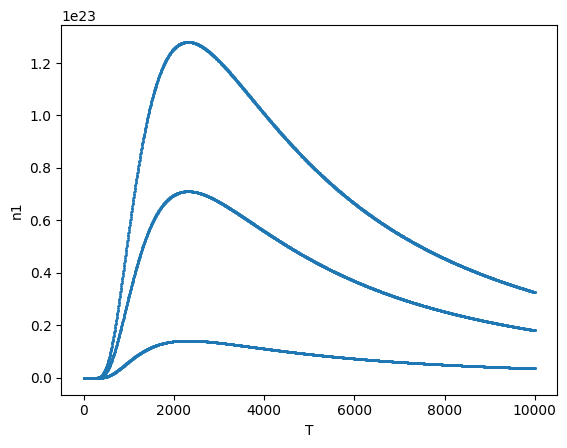

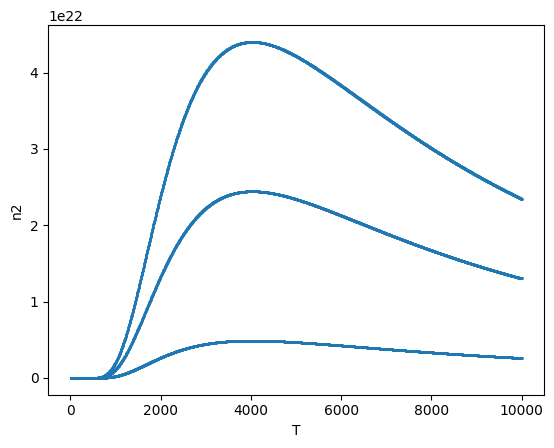

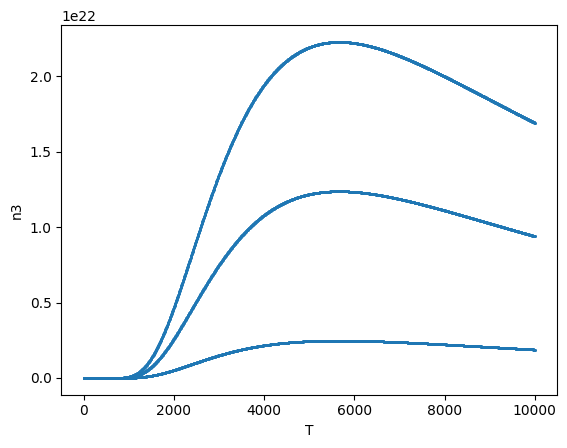

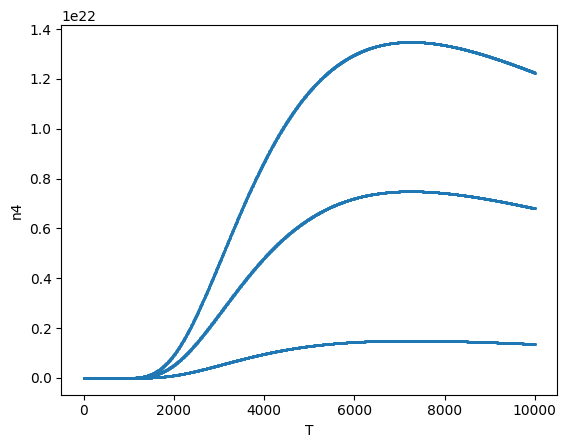

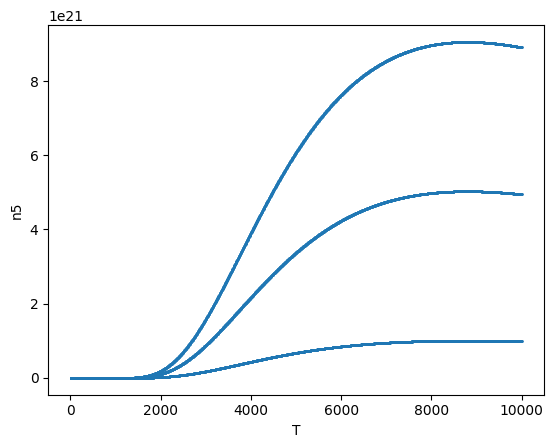

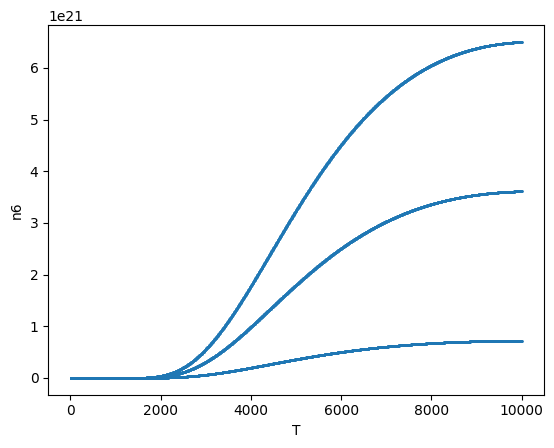

In [78]:
# import math
# # @title
# # Read and provide statistics on the dataset.
# n_mass = [i for i in range(0, 33)]
# print(n_mass)
# 
# #n_name_mass = [str(num) for num in n_mass]
# 
# #print(n_name_mass)
# 
# dataset = dataset_raw
# 
# # dataset['atom_n'] = math.log(dataset['atom_n'])
# dataset['atom_n'].apply(lambda x: math.log(x))
# dataset.describe()
# 
# #for n in n_name_mass:
# #    dataset[n].apply(lambda x: x if x >= 0 else math.log(x))

# Label the axes.
def create_plot(name):
    plt.xlabel("T")
    plt.ylabel(name)
    plt.scatter(dataset_raw["T"].tail(9000), dataset_raw[name].tail(9000), s = 1)
    plt.show()

plt.xlabel("T")
plt.ylabel("atom_n")
plt.scatter(dataset_raw["T"].tail(9000), dataset_raw["atom_n"].tail(9000), s = 1)
plt.show()

plt.xlabel("T")
plt.ylabel("n0")
plt.scatter(dataset_raw["T"].tail(9000), dataset_raw["n0"].tail(9000), s = 1)
plt.show()

create_plot("thermal_conductivity")
create_plot("shear_viscosity")
create_plot("bulk_viscosity")

create_plot("n0")
create_plot("n1")
create_plot("n2")
create_plot("n3")
create_plot("n4")
create_plot("n5")
create_plot("n6")

In [79]:
feature_mean = dataset_raw.mean(numeric_only=True)
feature_std = dataset_raw.std(numeric_only=True)
numerical_features = dataset_raw.select_dtypes('number').columns
normalized_dataset = (
    dataset_raw[numerical_features] - feature_mean
) / feature_std

normalized_dataset.describe()

,T,pressure,atom_n,n0,n1,n2,n3,n4,n5,n6,...,n41,n42,n43,n44,n45,n46,n47,thermal_conductivity,shear_viscosity,bulk_viscosity
count,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,...,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000
mean,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,...,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.73104,-0.72703,-1.22464,-0.10711,-1.12343,-1.17416,-1.09527,-1.00263,-0.92138,-0.85386,...,-0.37431,-0.37148,-0.36879,-0.36625,-0.36384,-0.36157,-0.35942,-2.75121,-2.65000,-1.22005
25%,-0.86552,-0.72703,-1.22464,-0.10291,-0.86071,-0.91211,-0.83914,-0.84742,-0.84775,-0.82076,...,-0.37431,-0.37148,-0.36879,-0.36625,-0.36384,-0.36157,-0.35942,-0.70644,-0.70833,-0.88620
50%,0.00000,-0.72703,-0.00000,-0.09570,-0.21766,-0.08376,-0.23794,-0.61188,-0.59128,-0.51720,...,-0.37398,-0.37119,-0.36854,-0.36603,-0.36365,-0.36140,-0.35928,0.15984,0.12865,-0.20809
75%,0.86552,1.37523,1.22464,-0.07040,0.61427,0.61348,0.52787,0.58515,0.71165,0.72942,...,-0.23145,-0.23458,-0.23732,-0.24006,-0.24269,-0.24485,-0.24682,0.82414,0.77120,0.73665
max,1.73104,1.37523,1.22464,52.77668,2.56008,1.99527,1.82939,1.87450,2.05565,2.34186,...,6.58768,6.64030,6.69083,6.73933,6.78579,6.83024,6.87273,1.67467,1.80727,2.31409


In [80]:
number_samples = len(normalized_dataset)
index_70th = round(number_samples * 0.7)
# index_90th = index_80th + round(number_samples * 0.1)

shuffled_dataset = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_dataset.iloc[0:index_70th]
test_data = shuffled_dataset.iloc[index_70th:]
# test_data = shuffled_dataset.iloc[index_90th:]

print("shuffled dataset")
print("set train, test datasets")
shuffled_dataset.describe()

shuffled dataset
set train, test datasets


,T,pressure,atom_n,n0,n1,n2,n3,n4,n5,n6,...,n41,n42,n43,n44,n45,n46,n47,thermal_conductivity,shear_viscosity,bulk_viscosity
count,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,...,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000,6000.00000
mean,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.73104,-0.72703,-1.22464,-0.10711,-1.12343,-1.17416,-1.09527,-1.00263,-0.92138,-0.85386,...,-0.37431,-0.37148,-0.36879,-0.36625,-0.36384,-0.36157,-0.35942,-2.75121,-2.65000,-1.22005
25%,-0.86552,-0.72703,-1.22464,-0.10291,-0.86071,-0.91211,-0.83914,-0.84742,-0.84775,-0.82076,...,-0.37431,-0.37148,-0.36879,-0.36625,-0.36384,-0.36157,-0.35942,-0.70644,-0.70833,-0.88620
50%,0.00000,-0.72703,-0.00000,-0.09570,-0.21766,-0.08376,-0.23794,-0.61188,-0.59128,-0.51720,...,-0.37398,-0.37119,-0.36854,-0.36603,-0.36365,-0.36140,-0.35928,0.15984,0.12865,-0.20809
75%,0.86552,1.37523,1.22464,-0.07040,0.61427,0.61348,0.52787,0.58515,0.71165,0.72942,...,-0.23145,-0.23458,-0.23732,-0.24006,-0.24269,-0.24485,-0.24682,0.82414,0.77120,0.73665
max,1.73104,1.37523,1.22464,52.77668,2.56008,1.99527,1.82939,1.87450,2.05565,2.34186,...,6.58768,6.64030,6.69083,6.73933,6.78579,6.83024,6.87273,1.67467,1.80727,2.31409


In [81]:
# Name of the features we'll train our model on.
input_features = [
    "T",
    "pressure",
    "atom_n",
    *["n" for i in range(0, 48)]
]

for i in range(0, 48):
    input_features[3 + i] += str(i)

print(input_features)

['T', 'pressure', 'atom_n', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47']


In [130]:
#label_columns = ['thermal_conductivity', 'shear_viscosity', 'bulk_viscosity']
label_columns = ['shear_viscosity']

train_features = train_data[input_features]
train_labels = train_data[label_columns]
test_features = test_data[input_features]
test_labels = test_data[label_columns]

In [ ]:
def create_model(
    input_features,
    learning_rate,
    metrics,
):
  """Create and compile a simple classification model."""
  model_inputs = [
      keras.Input(name=feature, shape=(1,))
      for feature in input_features
  ]
  # Use a Concatenate layer to assemble the different inputs into a single
  # tensor which will be given as input to the Dense layer.
  # For example: [input_1[0][0], input_2[0][0]]

  input = keras.layers.Concatenate()(model_inputs)
  level_1 = keras.layers.Dense(
      units=100, name='dense_1', activation=keras.activations.relu
  )(input)
  level_2 = keras.layers.Dense(
      units=100, name='dense_2', activation=keras.activations.relu
  )(level_1)
  # level_3 = keras.layers.Dense(
  #     units=100, name='dense_3', activation=keras.activations.relu
  # )(level_2)
  # level_4 = keras.layers.Dense(
  #     units=100, name='dense_4', activation=keras.activations.relu
  # )(level_3)
  # level_5 = keras.layers.Dense(
  #     units=50, name='dense_5', activation=keras.activations.relu
  # )(level_4)
  # level_6 = keras.layers.Dense(
  #     units=50, name='dense_6', activation=keras.activations.relu
  # )(level_5)
  model_output = keras.layers.Dense(
      units=1, name='output'
  )(level_2)

  model = keras.Model(inputs=input, outputs=model_output)

  # Call the compile method to transform the layers into a model that
  # Keras can execute.  Notice that we're using a different loss
  # function for classification than for regression.
  model.compile(
      optimizer=keras.optimizers.Adam(
        learning_rate
      ),
      loss=keras.losses.MeanAbsoluteError,
      metrics=metrics,
  )
  return model

def train_model(
    model: keras.Model,
    dataset,
    labels,
    number_epochs,
    batch_size,
    input_features
):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=batch_size,
      epochs=number_epochs,
  )

  return history

def plot_experiment_metrics(
    history, metric: str
):
  """Plot a curve of one or more metrics for different epochs."""
  plt.figure()

  plt.plot(
      history.epoch, pd.DataFrame(history.history)[metric], label=metric
  )

  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid()
  plt.legend()

print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7614 - my_mae: 0.7614 - my_mse: 0.8315
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7536 - my_mae: 0.7536 - my_mse: 0.8146 
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7489 - my_mae: 0.7489 - my_mse: 0.8055 
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7391 - my_mae: 0.7391 - my_mse: 0.7905 
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7270 - my_mae: 0.7270 - my_mse: 0.7667 
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7338 - my_mae: 0.7338 - my_mse: 0.7754 
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7221 - my_mae: 0.7221 - my_mse: 0.7578 
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7280 - my_mae: 0.7280 - my_mse: 0.7621
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6910 - my_mae: 0.6910 - my_mse: 0.6998 
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6912 - my_mae: 0.6912 - my_mse: 0.6971 


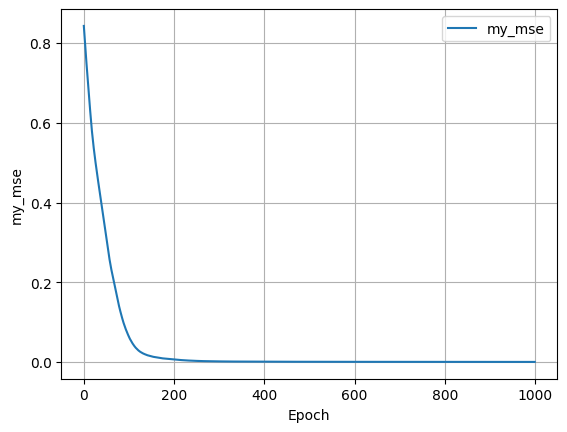

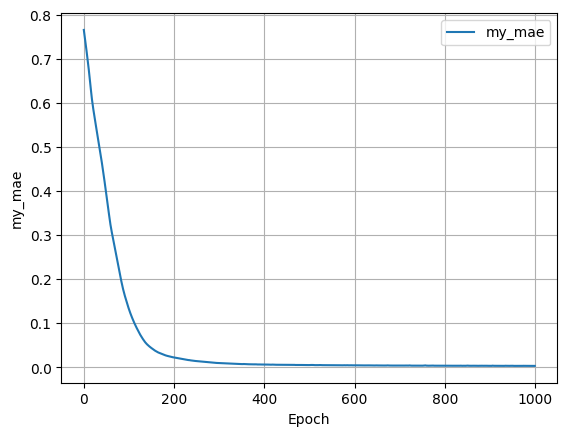

In [ ]:
# Let's define our first experiment settings.

metrics = [
    keras.metrics.MeanSquaredError(name='my_mse'),
    keras.metrics.MeanAbsoluteError(name='my_mae'),
]

# Establish the model's topography.
model = create_model(input_features, learning_rate=0.00001, metrics=metrics)

# Train the model on the training set.
# history = train_model(
#     model, train_features, train_labels, number_epochs=1000, batch_size=512, input_features=input_features,
# )
# features = {
#     feature_name: np.array(train_features[feature_name])
#     for feature_name in train_features
# }

# history = model.fit(
#     x=train_features,
#     y=train_labels,
#     batch_size=512,
#     epochs=1000,
# )
import time

start_time = time.time()

history = model.fit(
    x=train_features,
    y=train_labels,
    batch_size=512,
    epochs=1000,
)
end_time = time.time()

elapsed_time = end_time - start_time

print(f"The task took {elapsed_time:.2f} seconds to complete.")

# Plot metrics vs. epochs
plot_experiment_metrics(history, 'my_mse')
plot_experiment_metrics(history, 'my_mae')

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - loss: 5375.9395 - mae: 58.3237 - mse: 5375.9395
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5210.5137 - mae: 57.3100 - mse: 5210.5137
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5049.9224 - mae: 56.3098 - mse: 5049.9224
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4894.0034 - mae: 55.3228 - mse: 4894.0034
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4743.2095 - mae: 54.3555 - mse: 4743.2095
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4606.0420 - mae: 53.4617 - mse: 4606.0420
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4470.8901 - mae: 52.6009 - mse: 4470.8901
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4341.6826 - mae: 51.8314 - mse: 4341.6826
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4215.1362 - mae: 51.0677 - mse: 4215.1362
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4091.3477 - mae: 50.3099 - mse: 4091.347

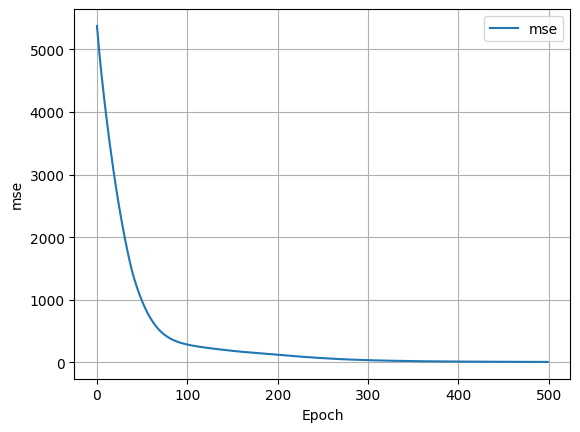

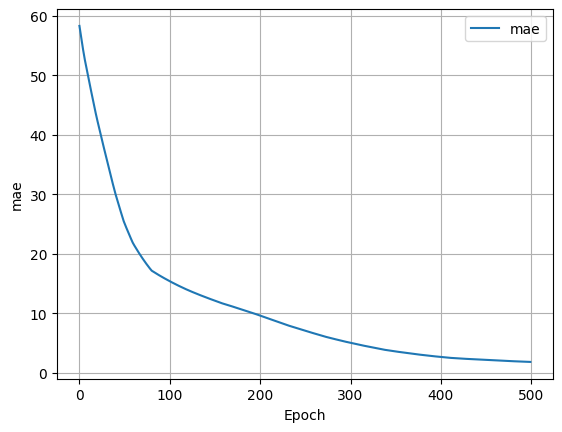

In [102]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation

X = np.array([[40, 80, 30, 60], [100, 40, 20, 80], [90, 190, 10, 15]])
Y = np.array([[10, 20, 30], [10, 40, 60], [80, 90,100]])

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['mae', 'mse'])

history = model.fit(X, Y, epochs=500, verbose=1)

plot_experiment_metrics(history, 'mse')
plot_experiment_metrics(history, 'mae')

In [2]:


X = np.array([[40, 80, 30, 60], [100, 40, 20, 80], [90, 190, 10, 15]])
Y = np.array([[10, 20, 30], [10, 40, 60], [80, 90, 100]])

input = keras.layers.Input(shape=(X.shape[1],))
level_1 = keras.layers.Dense(
    units=16, name='dense_1'
)(input)
level_2 = keras.layers.Dense(
    units=16, name='dense_2'
)(level_1)
model_output = keras.layers.Dense(
    units=3, name='output'
)(level_2)

model = keras.Model(inputs=input, outputs=model_output)
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['mae', 'mse'])

history = model.fit(X, Y, epochs=500, verbose=1)

plot_experiment_metrics(history, 'mse')
plot_experiment_metrics(history, 'mae')

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2166.1604 - mae: 41.3174 - mse: 2166.1604
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1954.1608 - mae: 39.2987 - mse: 1954.1608
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1763.6976 - mae: 37.3541 - mse: 1763.6976
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1592.6738 - mae: 35.4820 - mse: 1592.6738
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1439.2343 - mae: 33.6808 - mse: 1439.2343
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1301.6732 - mae: 31.9488 - mse: 1301.6732
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1178.4252 - mae: 30.2847 - mse: 1178.4252
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1068.0649 - mae: 28.6869 - mse: 1068.0649
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 969.2981 - mae: 27.1540 - mse: 969.2981
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 880.9616 - mae: 25.6853 - mse: 880.9616
Epoch

NameError: name 'plot_experiment_metrics' is not defined